# Reading DL1 Files and Performing Analysis

You now have the data reduced to the \_dl1.h5 level, using the data reduction method you wanted. The following sections will show you how to open these files and perform analysis with them.

## Introduction

The .h5 extension is used by HDF5 files https://support.hdfgroup.org/HDF5/whatishdf5.html.

Inside the HDF5 files are HDFStores, which are the format pandas DataFrames are stored inside HDF5 files. You can read about HDFStores here: https://pandas.pydata.org/pandas-docs/stable/io.html#hdf5-pytables.

Pandas DataFrames are a tabular data structure widely used by data scientists for Python analysis: https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe. They allow easy querying, sorting, grouping, and processing of data.

Inside the DL1 table, each column in the table corresponds to a different parameter that characterises the waveform, and each row corresponds to a different pixel or event.

Once you have DL1 files, you are in a position to perform investigations on the properties of the waveforms from the camera. To perform this analysis, all you need is CHECLabPy - you do not need to have any of the TARGET libraries installed.

## Files

To run this tutorial you must have a DL1 file. Here I will use the DL1 file produced from the "2_Reducing_R1_to_DL1.ipynb" tutorial:

In [45]:
dl1_path = "refdata/Run17473_dl1.h5"
dl1_path = "/Users/robertapillera/CTA/Muon_Analysis/CHEC/astrichec/data/Run13126_dl1.h5"
dl1_path = "/Users/robertapillera/CTA/Muon_Analysis/CHEC/astrichec/data/Run1_dl1.h5"
dl1_path = "/Users/robertapillera/CTA/Muon_Analysis/CHEC/astrichec/data/Run13357.hdf5"

## Reading DL1 Files

There are four main contents to the DL1 file: the metadata, the config used to create the file, the pixel position mapping, and the DL1 DataFrame

In [46]:
from CHECLabPy.core.io import DL1Reader
reader = DL1Reader(dl1_path)

Opening HDF5 file: /Users/robertapillera/CTA/Muon_Analysis/CHEC/astrichec/data/Run13357.hdf5


AttributeError: Attribute 'metadata' does not exist in node: '/SlowSignal/readout'

In [28]:
reader.metadata

{'source': 'CHECLabPy',
 'run_id': 6,
 'is_mc': True,
 'date_generated': datetime.datetime(2019, 6, 4, 16, 58, 52, 931524),
 'input_path': '/lfs/l2/chec/checs/data/astri_onsky_archive/d2019-05-15_simulations/muon/run1.simtel.gz',
 'n_events': 17257,
 'n_modules': 32,
 'n_pixels': 2048,
 'n_superpixels_per_module': 0,
 'n_samples': 128,
 'start_time': Timestamp('2019-05-14 16:27:03.039891958'),
 'end_time': Timestamp('2019-05-14 21:34:02.704135180'),
 'camera_version': '1.1.0',
 'n_cells': 0,
 'n_stale': 0,
 'n_bytes': 2615332864,
 'total_bytes': 2616782612,
 'version': '2.0.0'}

In [29]:
reader.config

{'baseline_start_mean': True,
 'baseline_start_rms': True,
 'waveform_max': True,
 'sp_argmax': True,
 'sp_max': True,
 'reference_pulse_path': '/lfs/l2/chec/Anaconda3/envs/cta/share/TargetCalib/dev/reference_pulse_checs_V1-1-0.cfg'}

In [30]:
reader.mapping

,pixel,slot,asic,channel,tmpix,row,col,sipmpix,superpixel,xpix,ypix
0,0,0,0,0,0,32,45,59,0,0.00452,0.00451
1,1,0,0,1,1,32,44,60,0,0.00451,0.01091
2,2,0,0,2,2,33,45,51,0,0.00451,0.01731
3,3,0,0,3,3,33,44,52,0,0.00450,0.02370
4,4,0,0,4,4,33,46,50,1,0.00450,0.03010
5,5,0,0,5,5,33,47,49,1,0.00449,0.03650
6,6,0,0,6,6,32,47,57,1,0.00449,0.04290
7,7,0,0,7,7,32,46,58,1,0.00448,0.04929
8,8,0,0,8,8,34,44,44,2,0.01091,0.00451
9,9,0,0,9,9,35,44,36,2,0.01091,0.01091


In [31]:
reader.load_entire_table()

Reading entire DataFrame (data) from HDF5 file into memory


,iev,pixel,t_cpu,t_tack,first_cell_id,baseline_subtracted,baseline_start_mean,baseline_start_rms,sp_argmax,sp_max,photons,pulse_time,pulse_height,mc_true
0,0,0,2019-05-14 16:27:03.039891958,0,0,0.005246,-0.043990,0.141168,44,0.811512,3.573389,87.340446,0.514042,0
1,0,1,2019-05-14 16:27:03.039891958,0,0,0.001255,-0.032871,0.100413,44,0.811512,0.230140,60.738094,0.265560,0
2,0,2,2019-05-14 16:27:03.039891958,0,0,-0.012924,0.022286,0.134212,44,0.811512,2.307477,58.179325,0.368109,0
3,0,3,2019-05-14 16:27:03.039891958,0,0,-0.007695,-0.033286,0.107361,44,0.811512,-1.213387,80.000000,0.240356,0
4,0,4,2019-05-14 16:27:03.039891958,0,0,0.016153,-0.001171,0.137071,78,0.573890,-1.447279,44.000000,0.330998,0
5,0,5,2019-05-14 16:27:03.039891958,0,0,-0.004282,0.053949,0.103527,78,0.573890,-0.127984,60.000000,0.354860,0
6,0,6,2019-05-14 16:27:03.039891958,0,0,0.004016,-0.016266,0.150730,78,0.573890,-2.763681,124.000000,0.268946,0
7,0,7,2019-05-14 16:27:03.039891958,0,0,-0.003694,-0.016910,0.110494,78,0.573890,-1.320527,10.000000,0.449313,0
8,0,8,2019-05-14 16:27:03.039891958,0,0,-0.010734,0.009872,0.152768,61,0.711780,5.973796,72.048355,0.423571,0
9,0,9,2019-05-14 16:27:03.039891958,0,0,0.017111,-0.029200,0.112797,61,0.711780,-3.182606,71.000000,0.279840,0


Additionally, the config used to create the DL1 file is stored, and the correct mapping for the pixels on the camera:

As you can see, the structure of the DL1 DataFrame is very intuitive, with each row reprenting a new event+pixel. Some extra useful information about the DataFrame can be obtained:

In [7]:
print("n_bytes = ", reader.n_bytes * 1E-9, "GB")
print("n_rows = ", reader.n_rows)
print("columns = ", reader.columns)
print("n_events = ", reader.n_events)
print("n_pixels = ", reader.n_pixels)

n_bytes =  2.9863321600000003 GB
n_rows =  42661888
columns =  ['iev', 'pixel', 't_cpu', 't_tack', 'first_cell_id', 'baseline_subtracted', 'baseline_start_mean', 'baseline_start_rms', 'sp_argmax', 'sp_max', 'photons', 'pulse_time', 'pulse_height']
n_events =  20831
n_pixels =  2048


As shown above, the `reader.load_entire_table()` method loads the entire table into memory. This may be a problem for very large runs, therefore there are a variety of methods for only loading a portion of the table:

In [8]:
# Obtain the nth event
df = reader[4]
df

[DL1Reader] Building Event Lookup


,iev,pixel,t_cpu,t_tack,first_cell_id,baseline_subtracted,baseline_start_mean,baseline_start_rms,sp_argmax,sp_max,photons,pulse_time,pulse_height
8192,4,0,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.338433,0.891725,1.482288,5,14.072697,3.217739,5.516396,4.665594
8193,4,1,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.478808,3.219703,4.764698,5,14.072697,14.377196,57.366631,10.678597
8194,4,2,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.707293,2.190376,2.475503,5,14.072697,1.208792,31.124584,6.297385
8195,4,3,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.610967,-3.211081,1.733439,5,14.072697,-5.854967,0.000000,4.090065
8196,4,4,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.688753,-3.954870,1.431413,27,10.725304,-1.925010,86.000000,3.661726
8197,4,5,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.761946,-2.434654,1.878156,27,10.725304,0.589420,52.359421,7.970515
8198,4,6,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.831896,-3.205845,1.582302,27,10.725304,-1.570817,127.000000,4.651080
8199,4,7,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.784560,-3.386645,1.074527,27,10.725304,-1.277629,74.000000,3.270858
8200,4,8,2019-05-08 00:00:06.688663465,23373228923709,2117,-2.029832,-4.038160,1.341683,91,13.879750,-0.563361,46.000000,5.862215
8201,4,9,2019-05-08 00:00:06.688663465,23373228923709,2117,-1.595297,-1.763783,1.524024,91,13.879750,2.033994,94.958694,6.217413


In [12]:
# Load a single column from table
#charge = reader.select_column('charge_cc')
charge = reader.select_column('photons')
charge = charge.values # Convert from Pandas Series to numpy array
charge

array([-3.278469 , -3.5449703,  1.916325 , ..., -1.2203635, -3.6336255,
       -5.0704126], dtype=float32)

In [13]:
# Load a single column for rows 0 to 100
#charge = reader.select_column('charge_cc', start=0, stop=100)
charge = reader.select_column('photons', start=0, stop=100)
charge = charge.values # Convert from Pandas Series to numpy array
charge

array([-3.278469  , -3.5449703 ,  1.916325  ,  9.7107725 ,  5.4050236 ,
        1.1771598 , -1.863438  ,  0.40236285,  6.9854856 , -2.3669808 ,
        3.1786866 ,  1.8374166 ,  3.397659  , -1.8258729 ,  6.323848  ,
       -1.0741807 ,  2.6892576 , -0.08462395, -0.8411829 ,  0.08078624,
       -0.20209548,  0.8303637 ,  1.1359098 , -2.8231196 ,  3.8171778 ,
       -2.632175  ,  2.6504376 , -4.073422  ,  4.7373495 ,  2.4012678 ,
       -6.82094   ,  4.527741  , -3.1379251 ,  1.8073374 ,  5.9915037 ,
        1.9098054 ,  2.6822658 ,  1.2875816 ,  8.5916195 , -1.6035895 ,
        1.1139569 , -1.9842687 , -0.65787196, -1.948597  ,  8.493914  ,
        0.6600659 ,  1.2405524 , -3.42906   , -3.6898663 ,  2.581522  ,
        2.4069488 ,  7.137017  ,  2.164971  ,  5.287568  ,  0.75047916,
        3.0310743 ,  0.50578034, -1.0143348 , -7.6076207 ,  3.6946604 ,
        2.6069448 , -2.279343  ,  0.856845  , -3.5549057 , -2.3798196 ,
       -0.13830018,  4.9626245 , -0.43053007,  6.8334618 ,  2.12

In [14]:
# Load multiple columns with the select_columns method
#pixel, charge = reader.select_columns(['pixel', 'charge_cc'])
pixel, charge = reader.select_columns(['pixel', 'photons'])
charge = charge.values # Convert from Pandas Series to numpy array
pixel = pixel.values # Convert from Pandas Series to numpy array
print('charge = ', charge)
print('pixel = ', pixel)

charge =  [-3.278469  -3.5449703  1.916325  ... -1.2203635 -3.6336255 -5.0704126]
pixel =  [   0    1    2 ... 2045 2046 2047]


In [15]:
# Loop through the rows
for row in reader.iterate_over_rows():
    break
    
row

,iev,pixel,t_cpu,t_tack,first_cell_id,baseline_subtracted,baseline_start_mean,baseline_start_rms,sp_argmax,sp_max,photons,pulse_time,pulse_height
0,0,0,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.332479,2.737331,2.432666,8,18.689747,-3.278469,23.0,8.290178


In [16]:
# Loop through the events
for df in reader.iterate_over_events():
    break
    
df

,iev,pixel,t_cpu,t_tack,first_cell_id,baseline_subtracted,baseline_start_mean,baseline_start_rms,sp_argmax,sp_max,photons,pulse_time,pulse_height
0,0,0,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.332479,2.737331,2.432666,8,18.689747,-3.278469,23.000000,8.290178
1,0,1,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.457755,1.089659,1.778077,8,18.689747,-3.544970,43.000000,14.359935
2,0,2,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.712198,0.173930,1.904042,8,18.689747,1.916325,14.912376,5.847046
3,0,3,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.607589,3.501783,2.239183,8,18.689747,9.710773,7.828317,7.777217
4,0,4,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.687655,3.999481,3.163173,23,14.991598,5.405024,31.439112,8.596413
5,0,5,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.777703,0.210899,1.102531,23,14.991598,1.177160,19.962513,5.929012
6,0,6,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.831622,1.811069,1.000341,23,14.991598,-1.863438,97.000000,7.458513
7,0,7,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.786009,1.323360,1.629954,23,14.991598,0.402363,-7.938066,6.099940
8,0,8,2019-05-08 00:00:06.562006033,17943953115438,1654,-2.028674,2.166331,1.765942,16,17.057165,6.985486,15.259269,9.976376
9,0,9,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.603593,3.060615,2.822685,16,17.057165,-2.366981,104.000000,7.389289


In [17]:
# Loop through chunks
for df in reader.iterate_over_chunks(chunksize=4000):
    break
    
df

,iev,pixel,t_cpu,t_tack,first_cell_id,baseline_subtracted,baseline_start_mean,baseline_start_rms,sp_argmax,sp_max,photons,pulse_time,pulse_height
0,0,0,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.332479,2.737331,2.432666,8,18.689747,-3.278469,23.000000,8.290178
1,0,1,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.457755,1.089659,1.778077,8,18.689747,-3.544970,43.000000,14.359935
2,0,2,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.712198,0.173930,1.904042,8,18.689747,1.916325,14.912376,5.847046
3,0,3,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.607589,3.501783,2.239183,8,18.689747,9.710773,7.828317,7.777217
4,0,4,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.687655,3.999481,3.163173,23,14.991598,5.405024,31.439112,8.596413
5,0,5,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.777703,0.210899,1.102531,23,14.991598,1.177160,19.962513,5.929012
6,0,6,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.831622,1.811069,1.000341,23,14.991598,-1.863438,97.000000,7.458513
7,0,7,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.786009,1.323360,1.629954,23,14.991598,0.402363,-7.938066,6.099940
8,0,8,2019-05-08 00:00:06.562006033,17943953115438,1654,-2.028674,2.166331,1.765942,16,17.057165,6.985486,15.259269,9.976376
9,0,9,2019-05-08 00:00:06.562006033,17943953115438,1654,-1.603593,3.060615,2.822685,16,17.057165,-2.366981,104.000000,7.389289


By using the "iterate" methods, one can process a portion of the table at a time, and consolidate the results at the end, avoiding the need to load the entire table in memory.

## Analysis Example

Here I will show two simple examples of some analysis:

In [18]:
%matplotlib inline

Opening HDF5 file: /Users/robertapillera/CTA/Muon_Analysis/CHEC/astrichec/data/Run13126_dl1.h5
-18.53704833984378


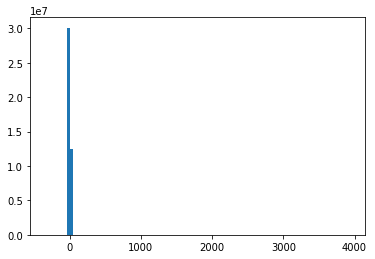

In [19]:
# Creating a histogram of all the cross-correlated charge in the DL1 file, and printng the charge corresponding to the maximum bin
from matplotlib import pyplot as plt
from CHECLabPy.core.io import DL1Reader
reader = DL1Reader(dl1_path)
#charge = reader.select_column('charge_cc').values
charge = reader.select_column('photons').values
hist, edges, _ = plt.hist(charge, bins=100)
between = (edges[1:] + edges[:-1]) / 2
max_ = between[hist.argmax()]
print(max_)

Opening HDF5 file: /Users/robertapillera/CTA/Muon_Analysis/CHEC/astrichec/data/Run13126_dl1.h5
[DL1Reader] Building Event Lookup


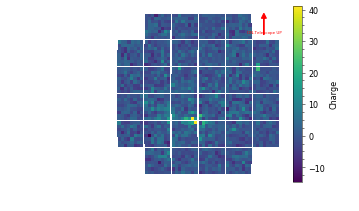

In [20]:
# Plotting a camera image of charge extracted per pixel for the nth event
from matplotlib import pyplot as plt
from CHECLabPy.core.io import DL1Reader
from CHECLabPy.plotting.camera import CameraImage

reader = DL1Reader(dl1_path)

#charge = reader.select_column('charge_cc').values
charge = reader.select_column('photons').values
iev = reader.select_column('iev').values
charge = charge[iev == 10]

# Or alternatively:
#charge = reader[10]['charge_cc'].values
charge = reader[10]['photons'].values

camera = CameraImage.from_mapping(reader.mapping)
camera.image = charge
camera.add_colorbar(label="Charge")
camera.annotate_on_telescope_up()

plt.show()

In [38]:
a = reader.read("pointing")


Reading entire DataFrame (pointing) from HDF5 file into memory


In [39]:
a.keys()

Index(['altitude_cor', 'altitude_raw', 'azimuth_cor', 'azimuth_raw', 'iev',
       't_cpu'],
      dtype='object')

In [41]:
a['altitude_raw']

0        1.570796
1        1.570796
2        1.570796
3        1.570796
4        1.570796
5        1.570796
6        1.570796
7        1.570796
8        1.570796
9        1.570796
10       1.570796
11       1.570796
12       1.570796
13       1.570796
14       1.570796
15       1.570796
16       1.570796
17       1.570796
18       1.570796
19       1.570796
20       1.570796
21       1.570796
22       1.570796
23       1.570796
24       1.570796
25       1.570796
26       1.570796
27       1.570796
28       1.570796
29       1.570796
           ...   
17227    1.570796
17228    1.570796
17229    1.570796
17230    1.570796
17231    1.570796
17232    1.570796
17233    1.570796
17234    1.570796
17235    1.570796
17236    1.570796
17237    1.570796
17238    1.570796
17239    1.570796
17240    1.570796
17241    1.570796
17242    1.570796
17243    1.570796
17244    1.570796
17245    1.570796
17246    1.570796
17247    1.570796
17248    1.570796
17249    1.570796
17250    1.570796
17251    1

In [43]:
type(a['altitude_raw'][0])


numpy.float32

In [44]:
Angle(90*u.deg)

NameError: name 'Angle' is not defined